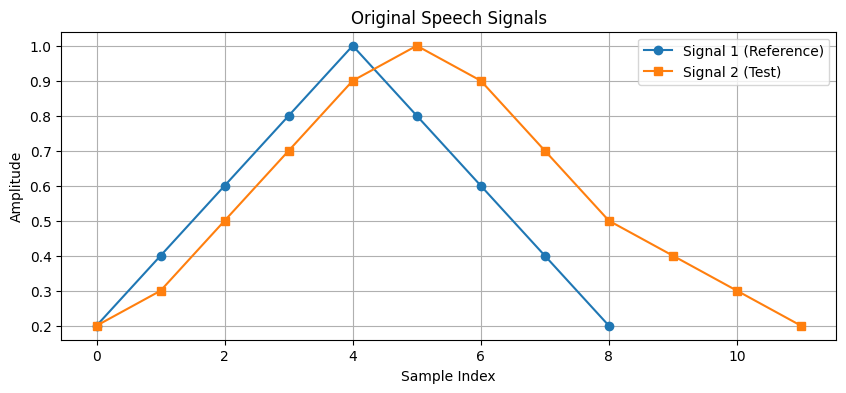

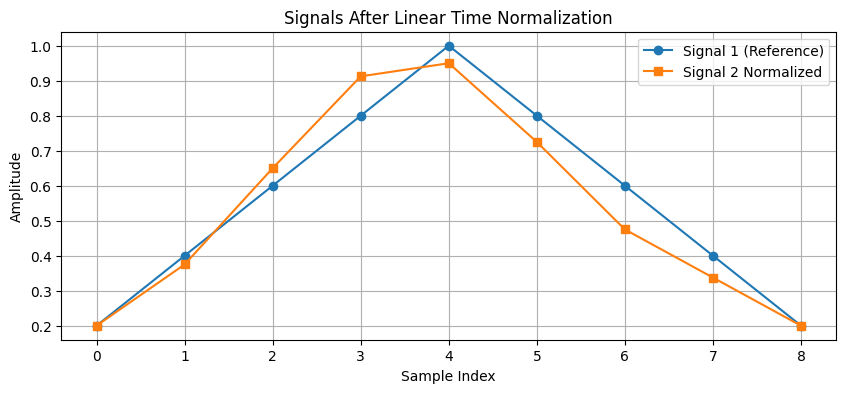

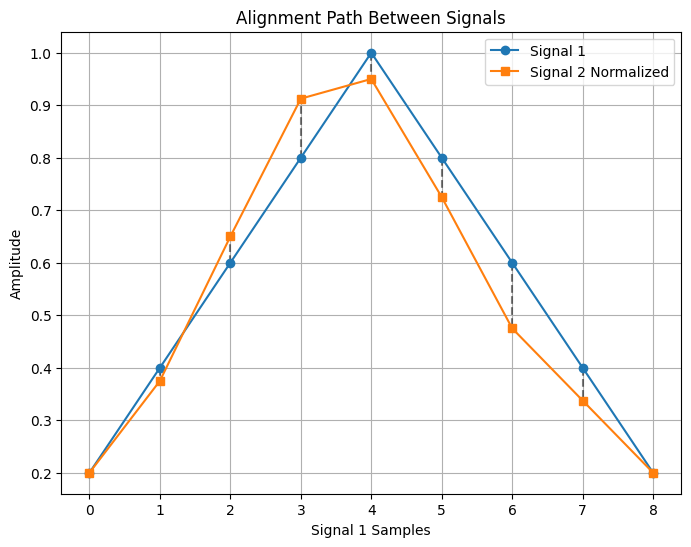

Inference:
Linear Time Normalization aligns the slower speech signal to match the length of the reference signal.
This allows corresponding parts of the waveforms to align in time, despite differences in speaking speed.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Given signals
signal1 = np.array([0.2, 0.4, 0.6, 0.8, 1.0, 0.8, 0.6, 0.4, 0.2])  # Reference
signal2 = np.array([0.2, 0.3, 0.5, 0.7, 0.9, 1.0, 0.9, 0.7, 0.5, 0.4, 0.3, 0.2])  # Test (slower)

# 1. Plot original signals
plt.figure(figsize=(10,4))
plt.plot(signal1, 'o-', label='Signal 1 (Reference)')
plt.plot(signal2, 's-', label='Signal 2 (Test)')
plt.title('Original Speech Signals')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

# 2. Linear Time Normalization (resample Signal 2 to length of Signal 1)
x_old = np.linspace(0, 1, len(signal2))
x_new = np.linspace(0, 1, len(signal1))
interpolator = interp1d(x_old, signal2, kind='linear')
signal2_normalized = interpolator(x_new)

# 3. Compute alignment (simple one-to-one correspondence after normalization)
alignment_path = list(zip(range(len(signal1)), range(len(signal2_normalized))))

# 4. Plot normalized signals
plt.figure(figsize=(10,4))
plt.plot(signal1, 'o-', label='Signal 1 (Reference)')
plt.plot(signal2_normalized, 's-', label='Signal 2 Normalized')
plt.title('Signals After Linear Time Normalization')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

# 5. Plot alignment path
plt.figure(figsize=(8,6))
for (i, j) in alignment_path:
    plt.plot([i, j], [signal1[i], signal2_normalized[j]], 'k--', alpha=0.5)
plt.plot(signal1, 'o-', label='Signal 1')
plt.plot(signal2_normalized, 's-', label='Signal 2 Normalized')
plt.title('Alignment Path Between Signals')
plt.xlabel('Signal 1 Samples')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

# 6. Inference
print("Inference:")
print("Linear Time Normalization aligns the slower speech signal to match the length of the reference signal.")
print("This allows corresponding parts of the waveforms to align in time, despite differences in speaking speed.")
